In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 7

In [4]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [5]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Create a new model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    './../Datasets/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

Found 46 images belonging to 7 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
    './../Datasets/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 47 images belonging to 7 classes.


In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/50


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step - accuracy: 0.2857 - loss: 2.0382 - val_accuracy: 0.3125 - val_loss: 7.8205
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0625 - loss: 10.7077 - val_accuracy: 0.3333 - val_loss: 3.0038
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.2143 - loss: 4.4155 - val_accuracy: 0.1562 - val_loss: 2.7005
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.2500 - loss: 4.5643 - val_accuracy: 0.6667 - val_loss: 1.2151
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.1429 - loss: 3.7305 - val_accuracy: 0.3750 - val_loss: 1.7990
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4688 - loss: 2.1852 - val_accuracy: 0.5333 - val_loss: 1.0027
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.2857 - loss: 2.4609 - val_accuracy: 0.5625 - val_loss: 1.2098
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.4375 - loss: 3.2200 - val_accuracy: 0.8667 - val_loss: 0.5533
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.00

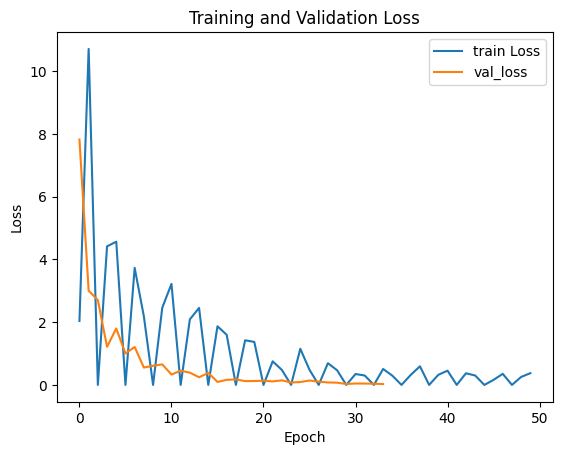

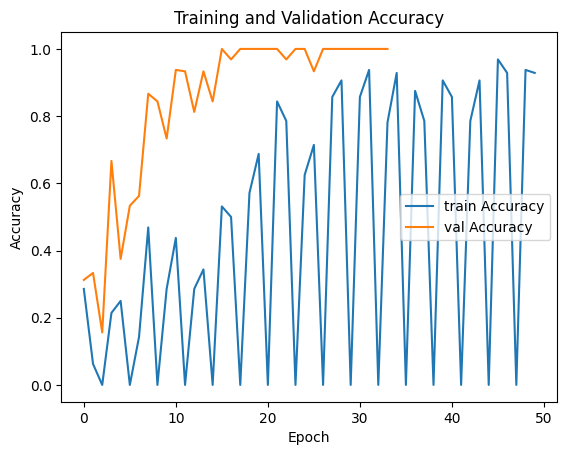

In [11]:
## plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('./../Images/loss_plot_model3.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(history.history['accuracy'], label='train Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('./../Images/accuracy_plot_model3.png')
plt.show()

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

# Replace 'path/to/your/image.jpg' with the path to the image you want to predict
image_path = './../Datasets/test/Black Scurf/6.jpg'
processed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(processed_image)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the predicted class
print(f'The predicted class is: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted class is: 0
